In [1]:
!pip install mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [2]:
movie=pd.read_csv('my_movies.csv')
movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [23]:
s = (movie.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [4]:
num_movie = movie.iloc[:,5:15]
num_movie.head()

,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [5]:
frequent_itemsets_ap = apriori(num_movie, min_support=0.15, use_colnames=True,verbose=1)
print(frequent_itemsets_ap.head())

Processing 3 combinations | Sampling itemset size 3
   support         itemsets
0     0.20          (LOTR2)
1     0.35  (Harry Potter2)
2     0.15           (LOTR)
3     0.30     (Braveheart)
4     0.45     (Green Mile)


C:\Users\Sai Prasath\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [6]:
frequent_itemsets_ap.sort_values("support", ascending = False).shape

(9, 2)

In [7]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
print(rules_ap.head())

       antecedents      consequents  antecedent support  consequent support  \
0     (Braveheart)  (Harry Potter2)                0.30                0.35   
1  (Harry Potter2)     (Braveheart)                0.35                0.30   
2  (Harry Potter2)     (Green Mile)                0.35                0.45   
3     (Green Mile)  (Harry Potter2)                0.45                0.35   
4     (Braveheart)     (Green Mile)                0.30                0.45   

   support  confidence      lift  leverage  conviction  
0      0.2    0.666667  1.904762    0.0950    1.950000  
1      0.2    0.571429  1.904762    0.0950    1.633333  
2      0.3    0.857143  1.904762    0.1425    3.850000  
3      0.3    0.666667  1.904762    0.1425    1.950000  
4      0.2    0.666667  1.481481    0.0650    1.650000  


In [8]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(12, 9)

In [9]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
7,"(Braveheart, Green Mile)",(Harry Potter2),0.2,0.35,0.2,1.000000,2.857143,0.13,inf,2
8,"(Harry Potter2, Green Mile)",(Braveheart),0.3,0.30,0.2,0.666667,2.222222,0.11,2.1,2
6,"(Braveheart, Harry Potter2)",(Green Mile),0.2,0.45,0.2,1.000000,2.222222,0.11,inf,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(1.5, 0, 'Green Mile'),
  Text(2.5, 0, 'Harry Potter2')])

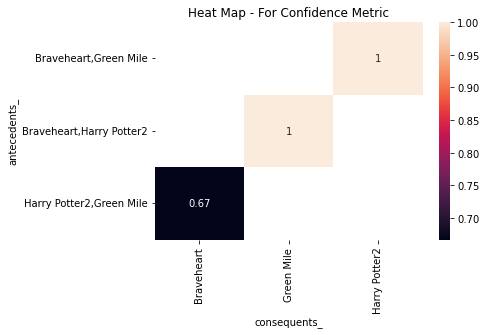

In [24]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [11]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
print(rules_ap_li.shape)

(12, 9)


In [12]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
7,"(Braveheart, Green Mile)",(Harry Potter2),0.2,0.35,0.2,1.000000,2.857143,0.13,inf,2
8,"(Harry Potter2, Green Mile)",(Braveheart),0.3,0.30,0.2,0.666667,2.222222,0.11,2.1,2
6,"(Braveheart, Harry Potter2)",(Green Mile),0.2,0.45,0.2,1.000000,2.222222,0.11,inf,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(1.5, 0, 'Green Mile'),
  Text(2.5, 0, 'Harry Potter2')])

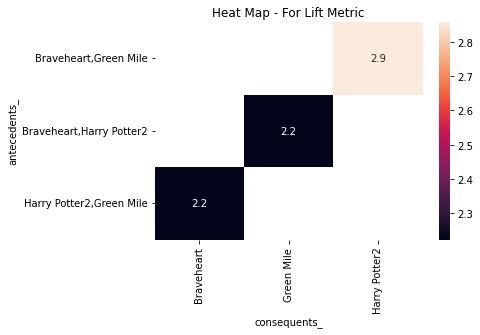

In [25]:
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [14]:
frequent_itemsets_fp=fpgrowth(num_movie, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

5 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (Green Mile)
0 itemset(s) from tree conditioned on items (LOTR2)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
0 itemset(s) from tree conditioned on items (LOTR)
(9, 2)


C:\Users\Sai Prasath\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
0,0.45,(Green Mile)
3,0.35,(Harry Potter2)
2,0.30,(Braveheart)
8,0.30,"(Harry Potter2, Green Mile)"
1,0.20,(LOTR2)


In [16]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)
print(rules_fp.head())

                   antecedents      consequents  antecedent support  \
0  (Braveheart, Harry Potter2)     (Green Mile)                0.20   
1     (Braveheart, Green Mile)  (Harry Potter2)                0.20   
2              (Harry Potter2)     (Green Mile)                0.35   

   consequent support  support  confidence      lift  leverage  conviction  
0                0.45      0.2    1.000000  2.222222    0.1100         inf  
1                0.35      0.2    1.000000  2.857143    0.1300         inf  
2                0.45      0.3    0.857143  1.904762    0.1425        3.85  


In [17]:
rules_fp[(rules_fp.support > 0.1) & (rules_fp.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(3, 9)

In [18]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
1,"(Braveheart, Green Mile)",(Harry Potter2),0.2,0.35,0.2,1.0,2.857143,0.13,inf,2
0,"(Braveheart, Harry Potter2)",(Green Mile),0.2,0.45,0.2,1.0,2.222222,0.11,inf,2


(array([0.5, 1.5]),
 [Text(0.5, 0, 'Green Mile'), Text(1.5, 0, 'Harry Potter2')])

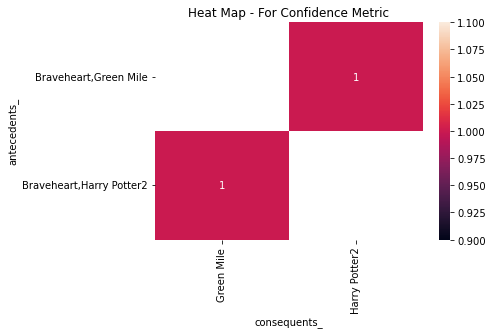

In [26]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [20]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.8)
print(rules_fp_li.shape)

(12, 9)


In [21]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
5,"(Braveheart, Green Mile)",(Harry Potter2),0.2,0.35,0.2,1.000000,2.857143,0.13,inf,2
6,"(Harry Potter2, Green Mile)",(Braveheart),0.3,0.30,0.2,0.666667,2.222222,0.11,2.1,2
4,"(Braveheart, Harry Potter2)",(Green Mile),0.2,0.45,0.2,1.000000,2.222222,0.11,inf,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(1.5, 0, 'Green Mile'),
  Text(2.5, 0, 'Harry Potter2')])

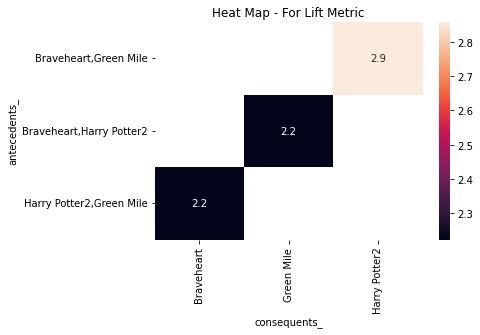

In [27]:
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)